Importing libraries

In [1]:
import pandas as pd


Load the Datasets

In [2]:
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

Convert Timestamp in Trader Data

In [3]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['date'] = trader_df['Timestamp IST'].dt.date

Format Sentiment Dates

In [4]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

Merge Datasets on Date

In [5]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

Check for Missing Sentiment Values

In [6]:
missing_sentiment = merged_df[merged_df['classification'].isnull()]
print(f"Missing sentiment rows: {len(missing_sentiment)}")

Missing sentiment rows: 6


Save the Merged Dataset

In [7]:
merged_df.to_csv("merged_trades_with_sentiment.csv", index=False)

Count of Trades in Each Sentiment

In [8]:
merged_df['classification'].value_counts()

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Average Closed PnL by Sentiment

In [9]:
merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

Total Closed PnL by Sentiment

In [10]:
merged_df.groupby('classification')['Closed PnL'].sum().sort_values(ascending=False)

classification
Fear             3.357155e+06
Extreme Greed    2.715171e+06
Greed            2.150129e+06
Neutral          1.292921e+06
Extreme Fear     7.391102e+05
Name: Closed PnL, dtype: float64

Average USD Size per Trade by Sentiment

In [11]:
merged_df.groupby('classification')['Size USD'].mean().sort_values(ascending=False)

classification
Fear             7816.109931
Greed            5736.884375
Extreme Fear     5349.731843
Neutral          4782.732661
Extreme Greed    3112.251565
Name: Size USD, dtype: float64

Plot to Visualize PnL Distribution

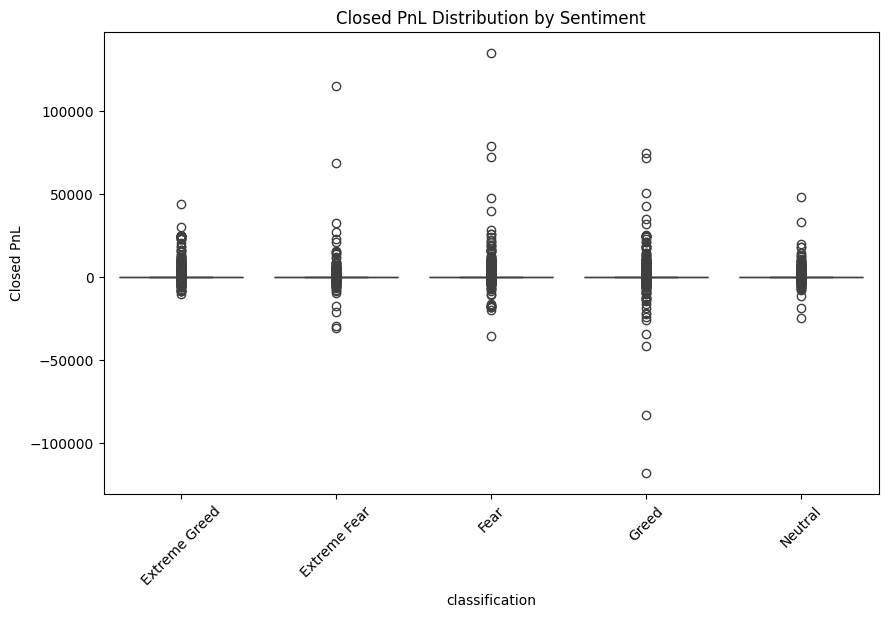

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Closed PnL Distribution by Sentiment')
plt.xticks(rotation=45)
plt.show()

Compare PnL by Side (Buy/Sell) in each sentiment

In [13]:
merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack().round(2)

Side,BUY,SELL
classification,,
Extreme Fear,34.11,34.98
Extreme Greed,10.50,114.58
Fear,63.93,45.05
Greed,25.00,59.69
Neutral,29.23,39.46


Trend: Average PnL over time

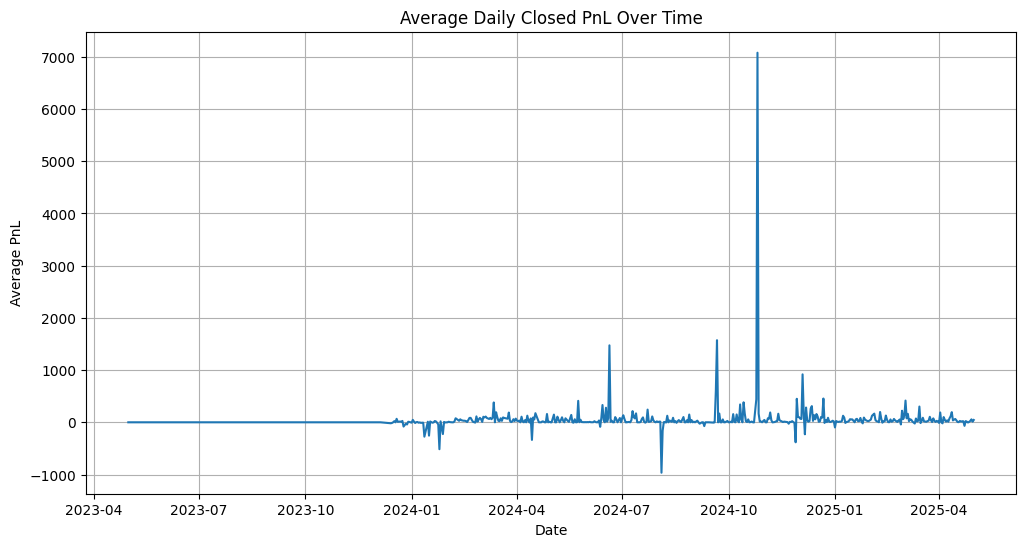

In [14]:
daily_pnl = merged_df.groupby('date')['Closed PnL'].mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
daily_pnl.plot(title="Average Daily Closed PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Average PnL")
plt.grid()
plt.show()